## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [146]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [147]:
df = pd.read_csv('D:/OneDrive/Desktop/Ai_Project/notebook/stud.csv')

#### Show Top 5 Records

In [148]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [149]:
X = df.drop(columns=['math_score'],axis=1)

In [150]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [151]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [152]:
y = df['math_score']

In [153]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [154]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [155]:
X = preprocessor.fit_transform(X)

In [156]:
X.shape

(1000, 19)

In [157]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [158]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [159]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

### Results

In [160]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.849362
5,Random Forest Regressor,0.848946
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.738081


## Linear Regression

In [161]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

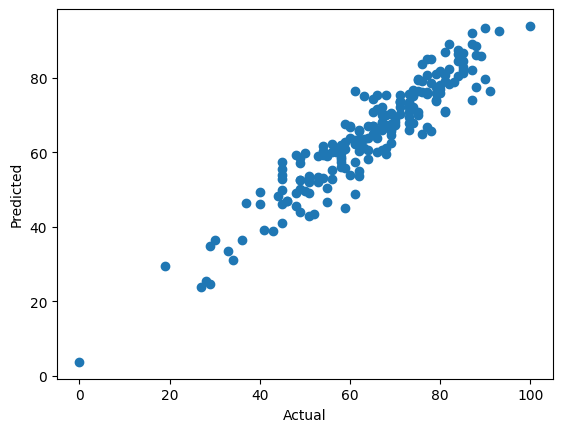

In [162]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

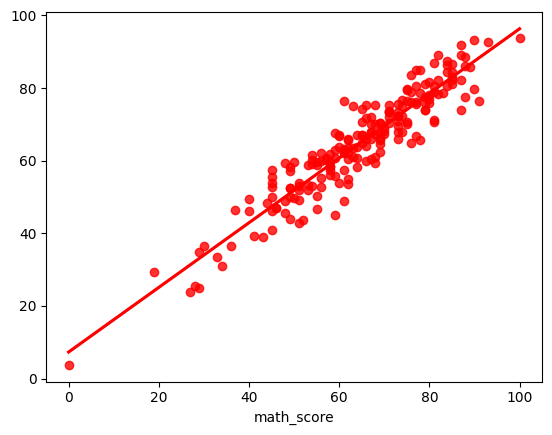

In [163]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [164]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


DECISON TREE RERESSION

Decision Tree Regressor Metrics:
R2 Score: 0.7354712614203102
Mean Squared Error: 64.37
Mean Absolute Error: 6.4


C:\Users\hashm\AppData\Local\Temp\ipykernel_16752\840456732.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')


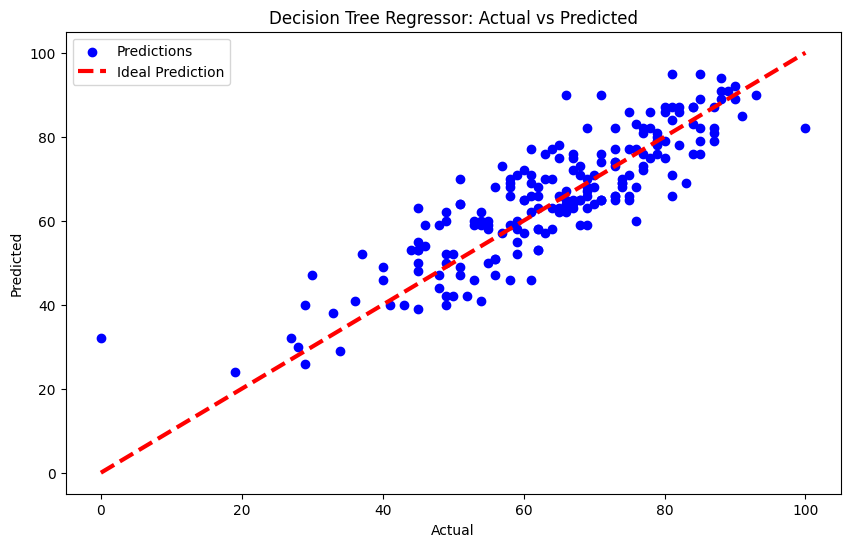

In [165]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Creating and fitting the Decision Tree Regressor model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Calculating metrics
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print("Decision Tree Regressor Metrics:")
print("R2 Score:", r2_tree)
print("Mean Squared Error:", mse_tree)
print("Mean Absolute Error:", mae_tree)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.legend()
plt.show()


Linear Regression Metrics:
R2 Score: 0.8803449074540941
Mean Squared Error: 29.116678771972655
Mean Absolute Error: 4.2158203125

Decision Tree Regressor Metrics:
R2 Score: 0.749628500886009
Mean Squared Error: 60.925
Mean Absolute Error: 6.195

Random Forest Regressor Metrics:
R2 Score: 0.8502600251508462
Mean Squared Error: 36.437485895833326
Mean Absolute Error: 4.6607

SVM Metrics:
R2 Score: 0.7286001513223705
Mean Squared Error: 66.04200493745648
Mean Absolute Error: 5.4015392444969965

K-Nearest Neighbors Metrics:
R2 Score: 0.7838129945787431
Mean Squared Error: 52.6066
Mean Absolute Error: 5.621

AdaBoost Regressor Metrics:
R2 Score: 0.8418816200450824
Mean Squared Error: 38.47627358882173
Mean Absolute Error: 4.855131975551256


C:\Users\hashm\AppData\Local\Temp\ipykernel_16752\270513703.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
C:\Users\hashm\AppData\Local\Temp\ipykernel_16752\270513703.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
C:\Users\hashm\AppData\Local\Temp\ipykernel_16752\270513703.py:108: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', 

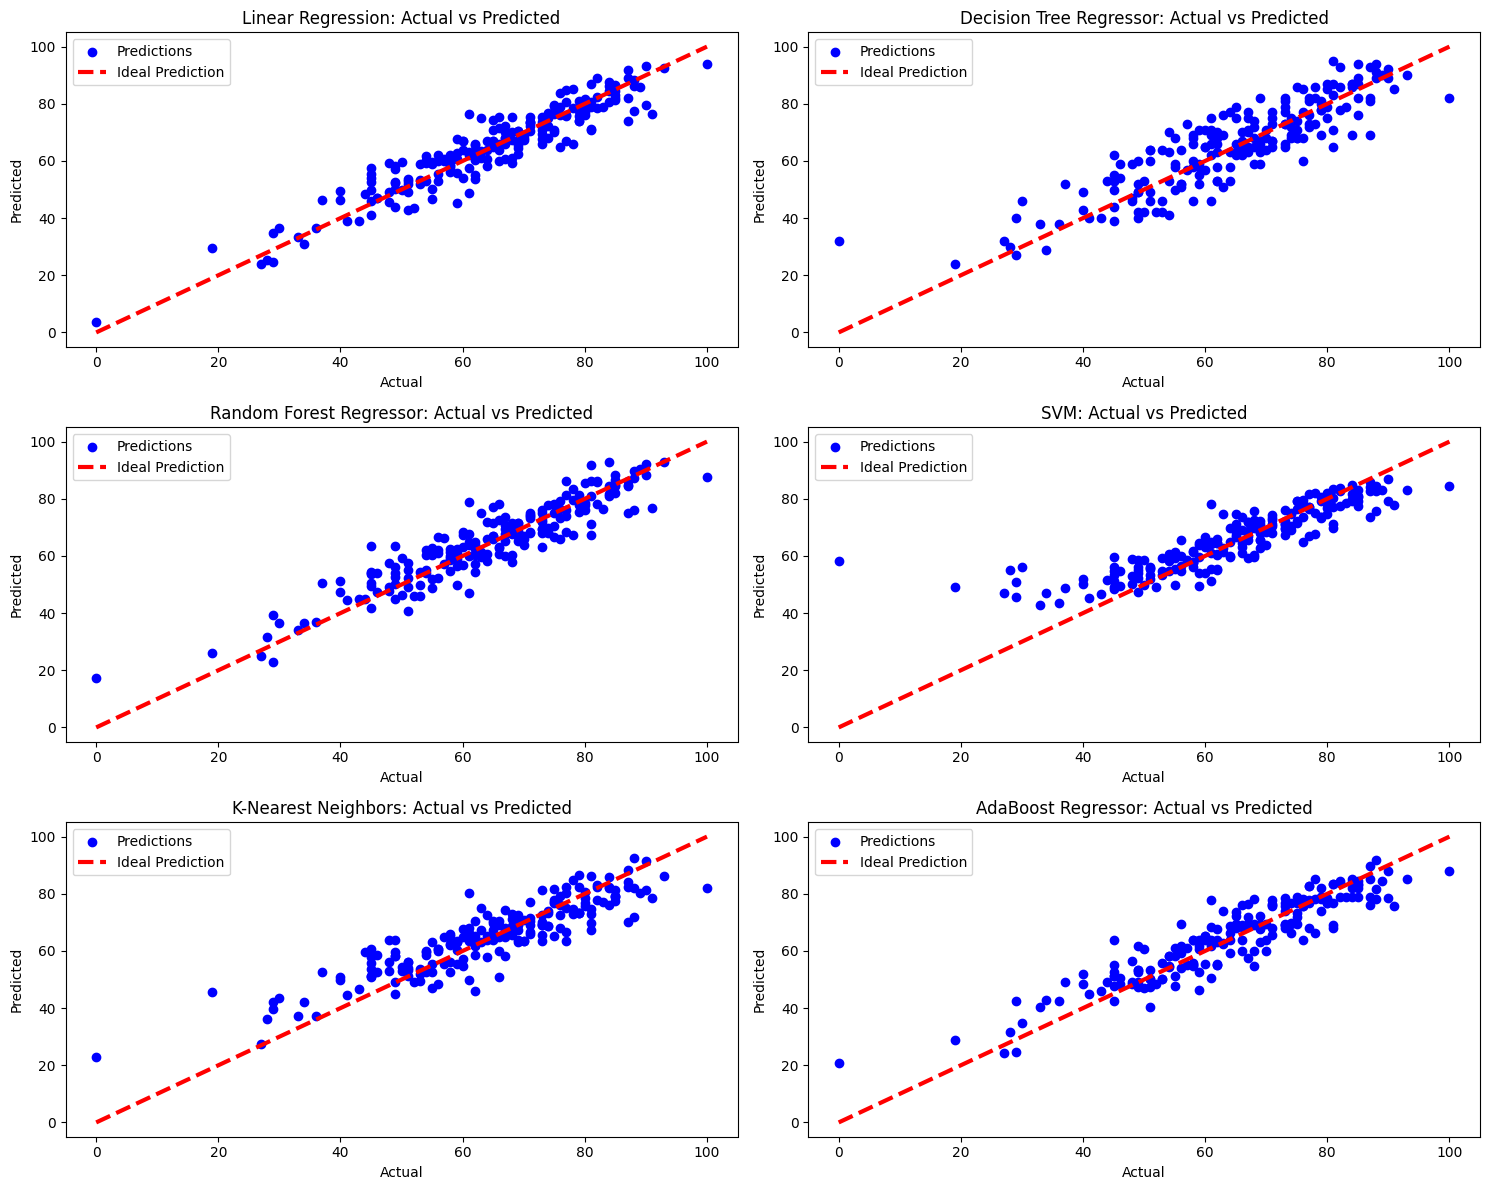

In [166]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
score_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
score_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Support Vector Regression
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
score_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
score_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# AdaBoost Regressor
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
score_ada = r2_score(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)

# Metrics
print("Linear Regression Metrics:")
print("R2 Score:", score_lin)
print("Mean Squared Error:", mse_lin)
print("Mean Absolute Error:", mae_lin)
print("\nDecision Tree Regressor Metrics:")
print("R2 Score:", r2_tree)
print("Mean Squared Error:", mse_tree)
print("Mean Absolute Error:", mae_tree)
print("\nRandom Forest Regressor Metrics:")
print("R2 Score:", score_rf)
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("\nSVM Metrics:")
print("R2 Score:", score_svm)
print("Mean Squared Error:", mse_svm)
print("Mean Absolute Error:", mae_svm)
print("\nK-Nearest Neighbors Metrics:")
print("R2 Score:", score_knn)
print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("\nAdaBoost Regressor Metrics:")
print("R2 Score:", score_ada)
print("Mean Squared Error:", mse_ada)
print("Mean Absolute Error:", mae_ada)

# Plotting
plt.figure(figsize=(15, 12))

# Linear Regression Plot
plt.subplot(3, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

# Decision Tree Regression Plot
plt.subplot(3, 2, 2)
plt.scatter(y_test, y_pred_tree, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.legend()

# Random Forest Regression Plot
plt.subplot(3, 2, 3)
plt.scatter(y_test, y_pred_rf, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.legend()

# SVM Plot
plt.subplot(3, 2, 4)
plt.scatter(y_test, y_pred_svm, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM: Actual vs Predicted')
plt.legend()

# K-Nearest Neighbors Plot
plt.subplot(3, 2, 5)
plt.scatter(y_test, y_pred_knn, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-Nearest Neighbors: Actual vs Predicted')
plt.legend()

# AdaBoost Regressor Plot
plt.subplot(3, 2, 6)
plt.scatter(y_test, y_pred_ada, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Ideal Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('AdaBoost Regressor: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


Linear Regression:
R2 Score: 0.02775062718147192
Mean Squared Error: 236.58560678266412
Mean Absolute Error: 12.05394264817403

Decision Tree:
R2 Score: 0.02775062718147192
Mean Squared Error: 236.58560678266412
Mean Absolute Error: 12.05394264817403

Random Forest:
R2 Score: 0.02820620483326408
Mean Squared Error: 236.47474724580127
Mean Absolute Error: 12.0527813844656

SVM:
R2 Score: 0.018650570587042004
Mean Squared Error: 238.79999999426215
Mean Absolute Error: 12.08599999987626

KNN:
R2 Score: -0.10221074848852463
Mean Squared Error: 268.2102
Mean Absolute Error: 13.029000000000002

AdaBoost:
R2 Score: 0.04461668706248678
Mean Squared Error: 232.48144675691375
Mean Absolute Error: 12.027320612309982



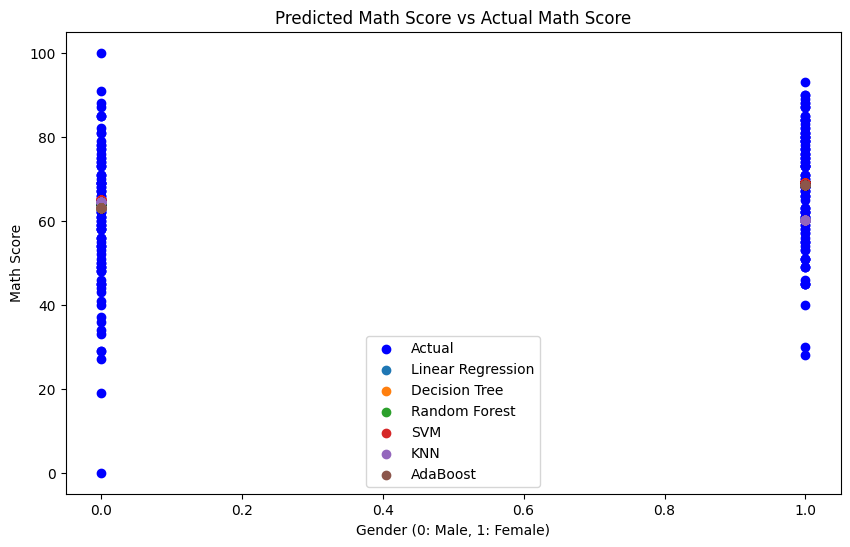

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv("stud.csv")

# Prepare the data
X = data[['gender']]  # Features
y = data['math_score']  # Target variable

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# SVM
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# AdaBoost Regressor
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Evaluate the models
models = {
    "Linear Regression": y_pred_lin,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn,
    "AdaBoost": y_pred_ada
}

for model_name, predictions in models.items():
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    print(f"{model_name}:")
    print(f"R2 Score: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print()

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
for model_name, predictions in models.items():
    plt.scatter(X_test, predictions, label=model_name)
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Math Score')
plt.title('Predicted Math Score vs Actual Math Score')
plt.legend()
plt.show()


C:\Users\hashm\AppData\Local\Temp\ipykernel_16752\81107270.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender_male', y='math_score', data=data, palette='Set3')


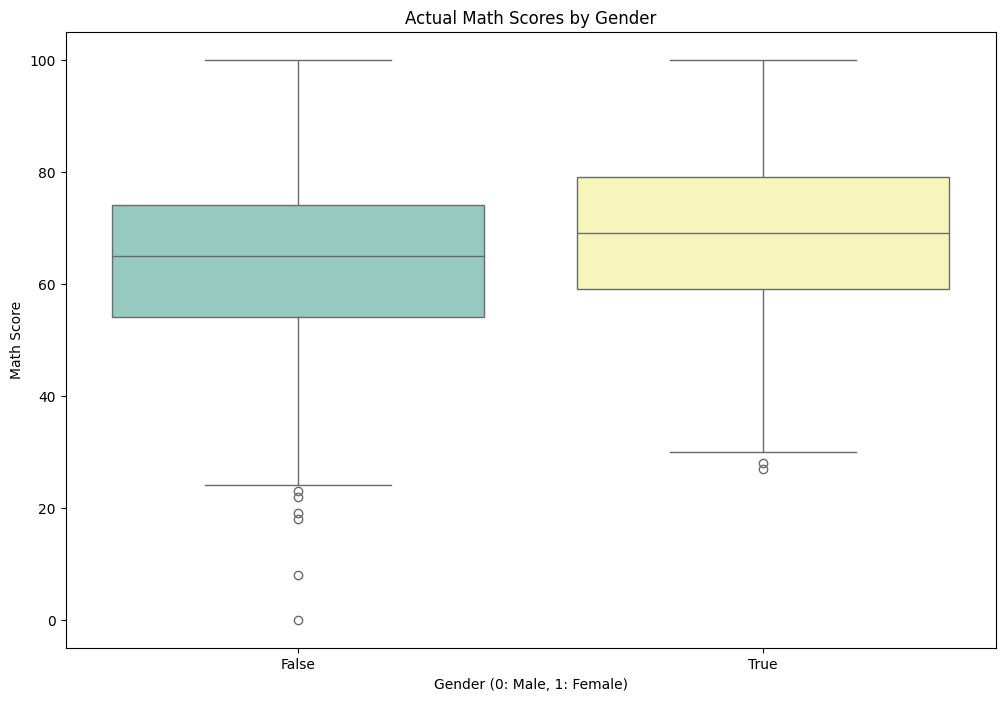

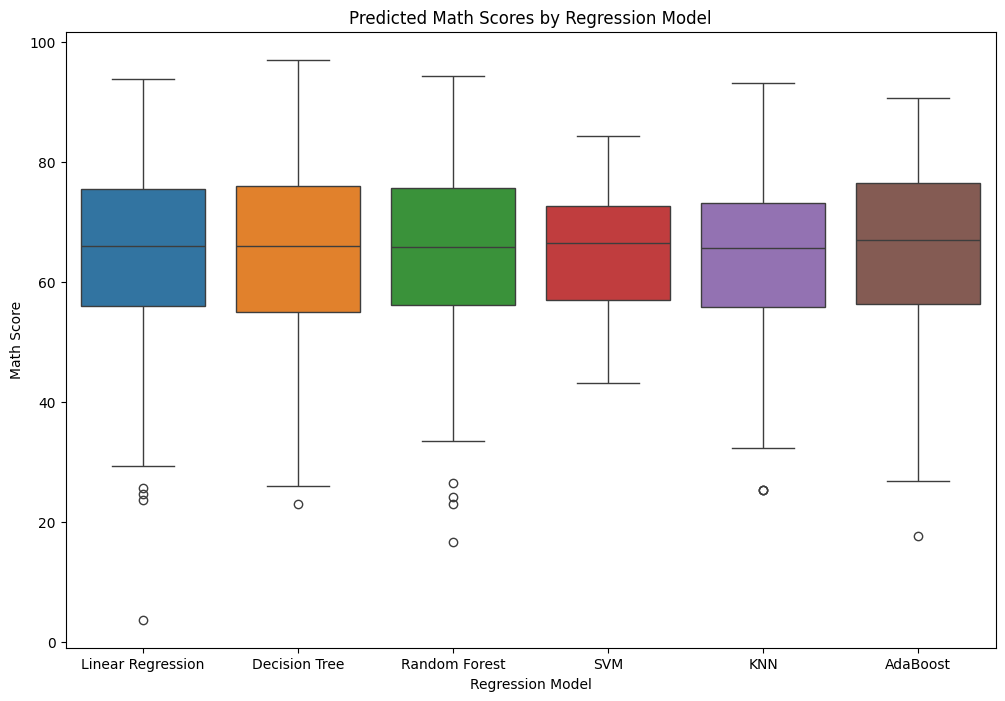

In [168]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv("stud.csv")

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['math_score'])
y = data['math_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

# Visualize using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='gender_male', y='math_score', data=data, palette='Set3')
plt.title('Actual Math Scores by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Math Score')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(predictions))
plt.title('Predicted Math Scores by Regression Model')
plt.xlabel('Regression Model')
plt.ylabel('Math Score')
plt.show()


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv("stud.csv")

# Split the data into features (X) and the target variables (y)
X = data[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']]
y_math = data['math_score']
y_reading = data['reading_score']
y_writing = data['writing_score']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
_, _, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=42)
_, _, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

# Train and predict for math score
print("Predicting Math Score:")
for model_name, model in models.items():
    model.fit(X_train, y_train_math)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test_math, y_pred)
    mse = mean_squared_error(y_test_math, y_pred)
    mae = mean_absolute_error(y_test_math, y_pred)
    print(f"{model_name}:")
    print(f"R2 Score: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print()

# Train and predict for reading score
print("Predicting Reading Score:")
for model_name, model in models.items():
    model.fit(X_train, y_train_reading)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test_reading, y_pred)
    mse = mean_squared_error(y_test_reading, y_pred)
    mae = mean_absolute_error(y_test_reading, y_pred)
    print(f"{model_name}:")
    print(f"R2 Score: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print()

# Train and predict for writing score
print("Predicting Writing Score:")
for model_name, model in models.items():
    model.fit(X_train, y_train_writing)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test_writing, y_pred)
    mse = mean_squared_error(y_test_writing, y_pred)
    mae = mean_absolute_error(y_test_writing, y_pred)
    print(f"{model_name}:")
    print(f"R2 Score: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print()


Predicting Math Score:
Linear Regression:
R2 Score: 0.17599998338251166
Mean Squared Error: 200.510845643673
Mean Absolute Error: 11.269872775277623

Decision Tree:
R2 Score: -0.08016635034308228
Mean Squared Error: 262.8459514263251
Mean Absolute Error: 12.786495448995447

Random Forest:
R2 Score: -0.015684463567916973
Mean Squared Error: 247.15503226947519
Mean Absolute Error: 12.396099504589726

SVM:
R2 Score: 0.1254554533260407
Mean Squared Error: 212.81027071636657
Mean Absolute Error: 11.634786100459756

KNN:
R2 Score: -0.030283752995828195
Mean Squared Error: 250.7076
Mean Absolute Error: 12.628

AdaBoost:
R2 Score: 0.1148026589486556
Mean Squared Error: 215.40250465568846
Mean Absolute Error: 11.399823133805041

Predicting Reading Score:
Linear Regression:
R2 Score: 0.15939617857969446
Mean Squared Error: 190.21551035270545
Mean Absolute Error: 10.830287958543586

Decision Tree:
R2 Score: -0.0772046524802672
Mean Squared Error: 243.75458153358943
Mean Absolute Error: 12.1867070

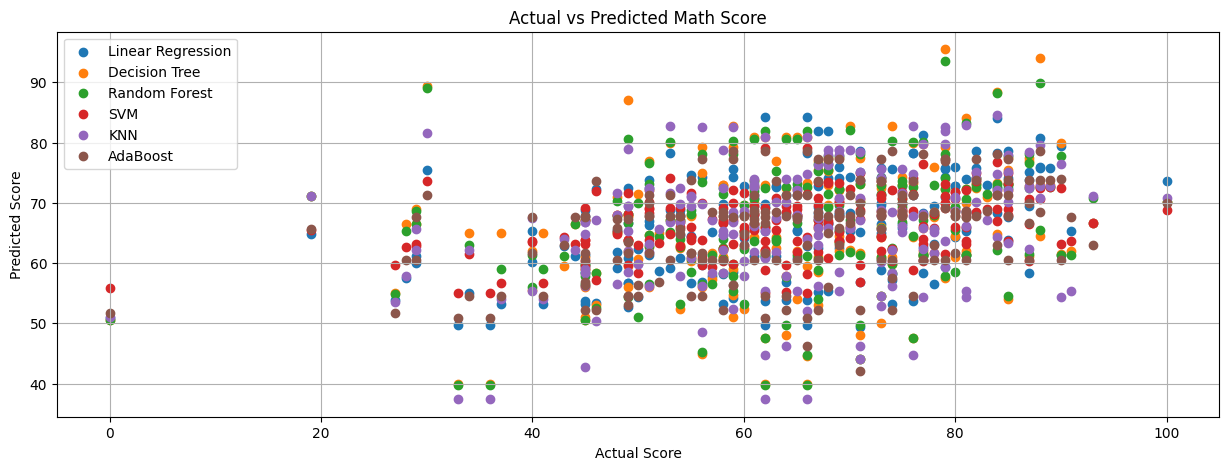

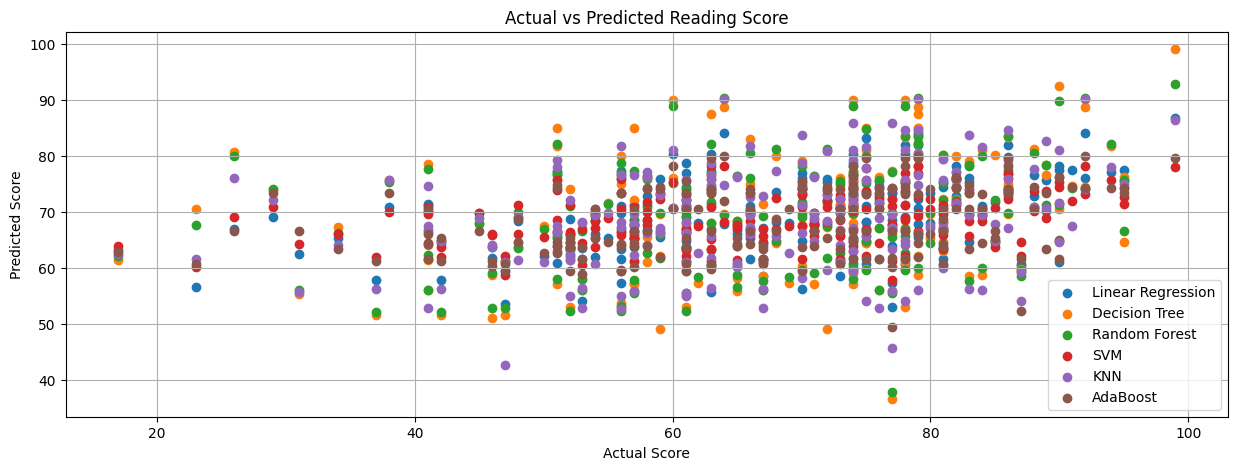

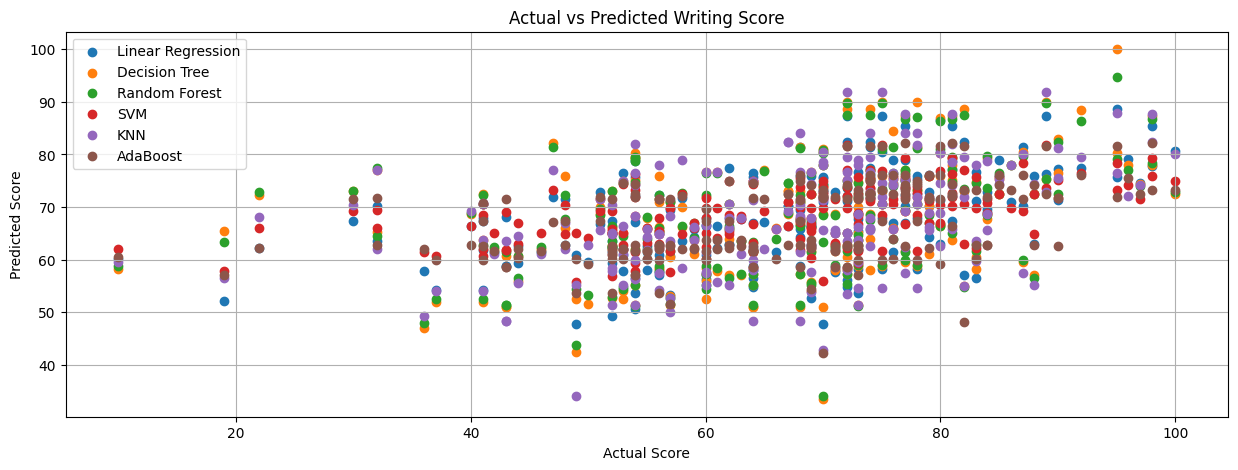

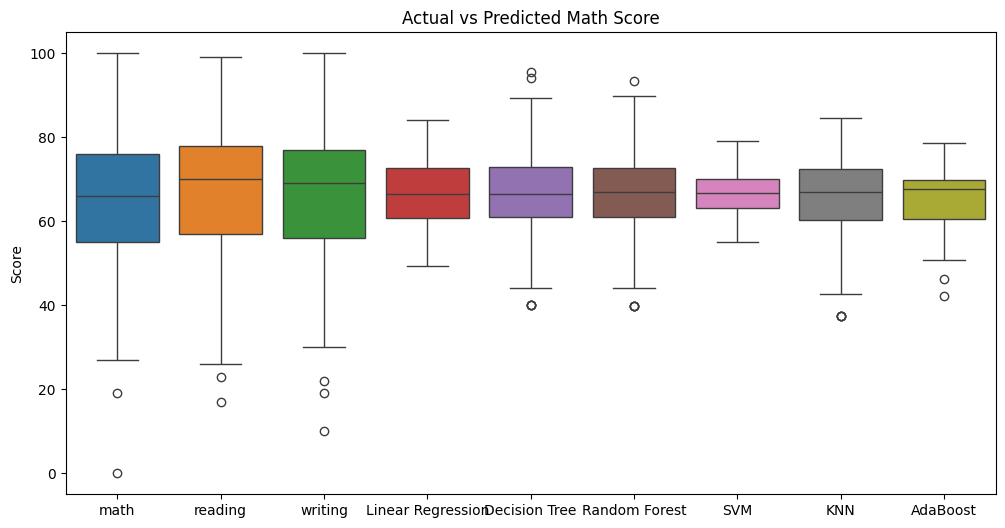

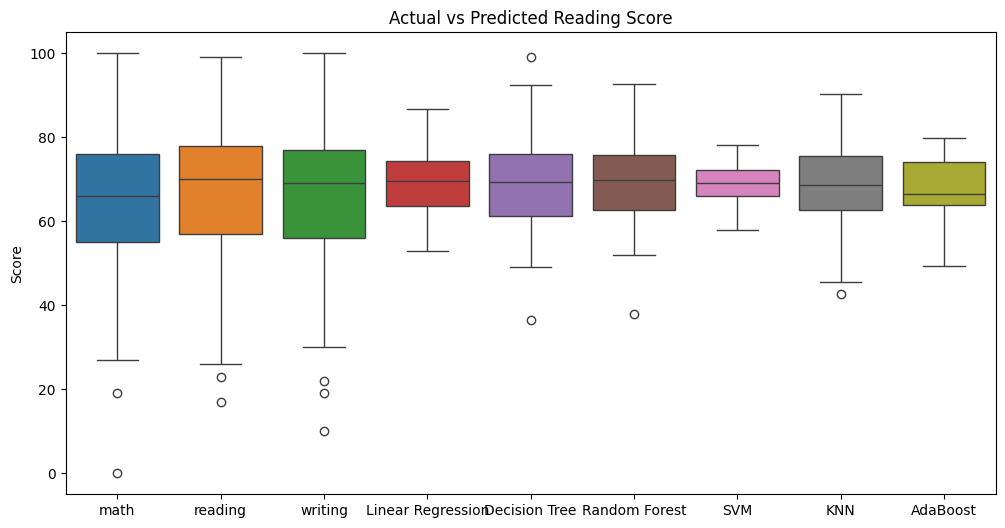

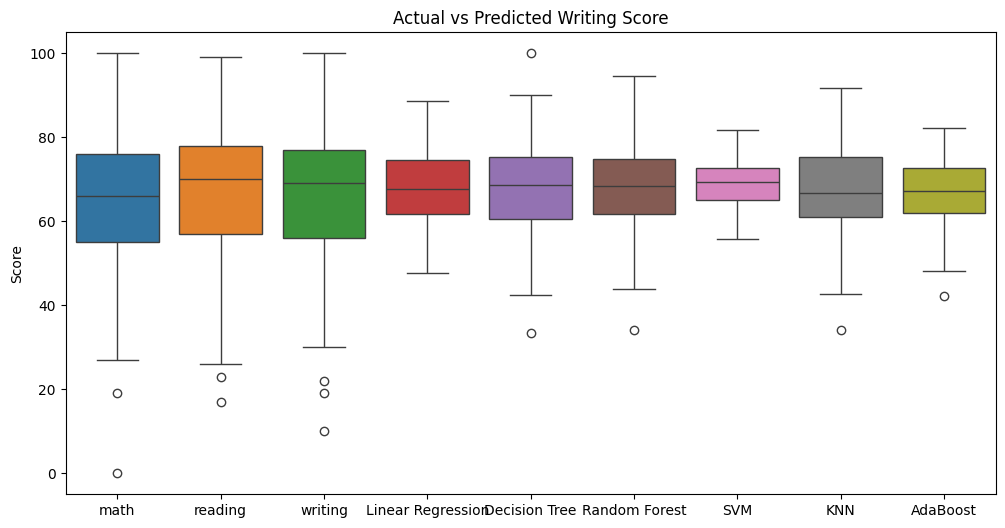

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("stud.csv")

# Split the data into features (X) and the target variables (y)
X = data[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']]
y_math = data['math_score']
y_reading = data['reading_score']
y_writing = data['writing_score']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
_, _, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=42)
_, _, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

# Initialize lists to store actual and predicted scores
actual_scores = {'math': y_test_math, 'reading': y_test_reading, 'writing': y_test_writing}
predicted_scores = {key: {model_name: [] for model_name in models.keys()} for key in actual_scores.keys()}

# Train and predict for each subject
for model_name, model in models.items():
    model.fit(X_train, y_train_math)
    y_pred = model.predict(X_test)
    predicted_scores['math'][model_name] = y_pred

    model.fit(X_train, y_train_reading)
    y_pred = model.predict(X_test)
    predicted_scores['reading'][model_name] = y_pred

    model.fit(X_train, y_train_writing)
    y_pred = model.predict(X_test)
    predicted_scores['writing'][model_name] = y_pred

# Plot actual vs predicted scores using scatter plots
for subject in actual_scores.keys():
    plt.figure(figsize=(15, 5))
    for model_name, y_pred in predicted_scores[subject].items():
        plt.scatter(actual_scores[subject], y_pred, label=model_name)
    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    plt.title(f'Actual vs Predicted {subject.capitalize()} Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot actual vs predicted scores using box plots
for subject in actual_scores.keys():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=pd.DataFrame({**actual_scores, **predicted_scores[subject]}))
    plt.title(f'Actual vs Predicted {subject.capitalize()} Score')
    plt.ylabel('Score')
    plt.show()


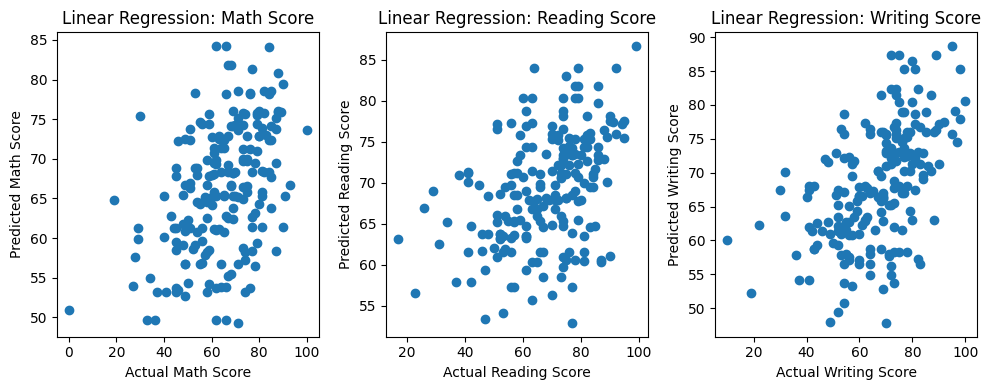

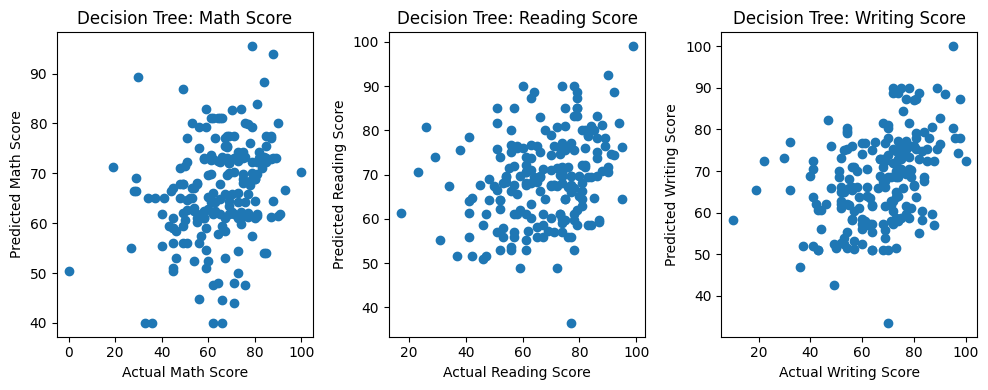

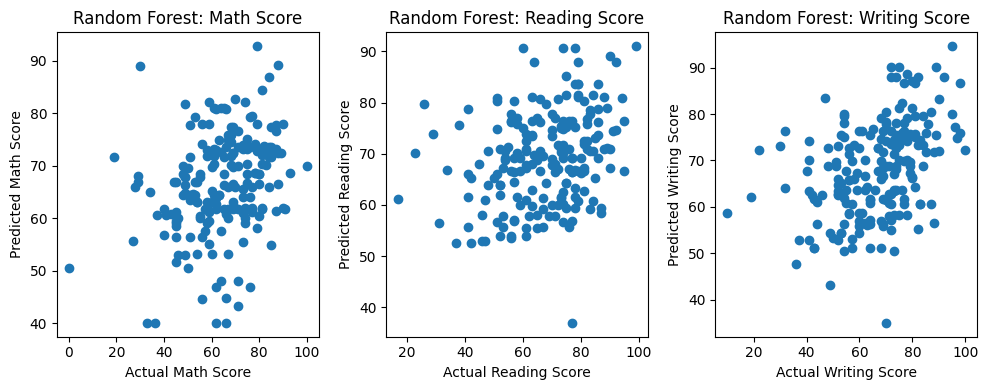

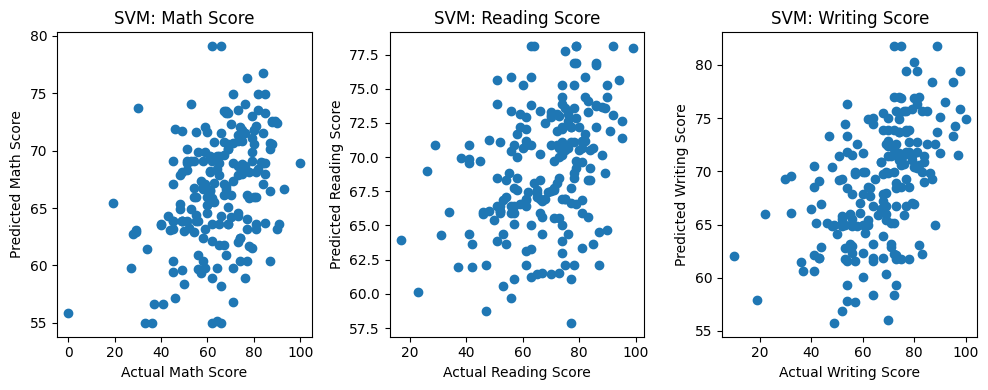

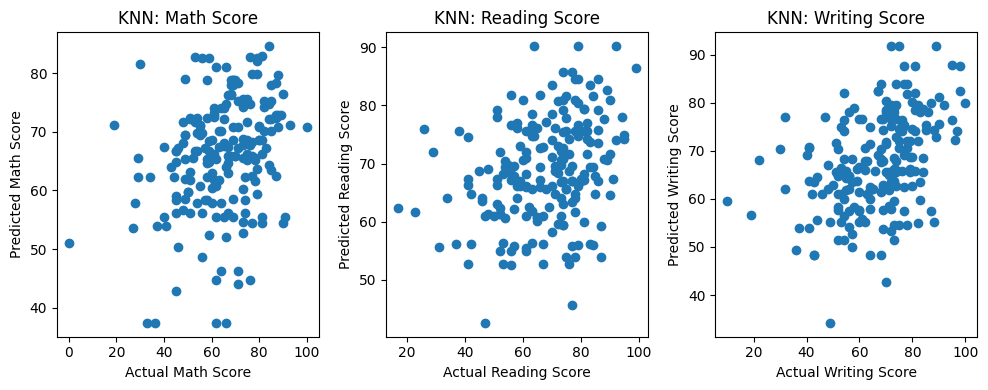

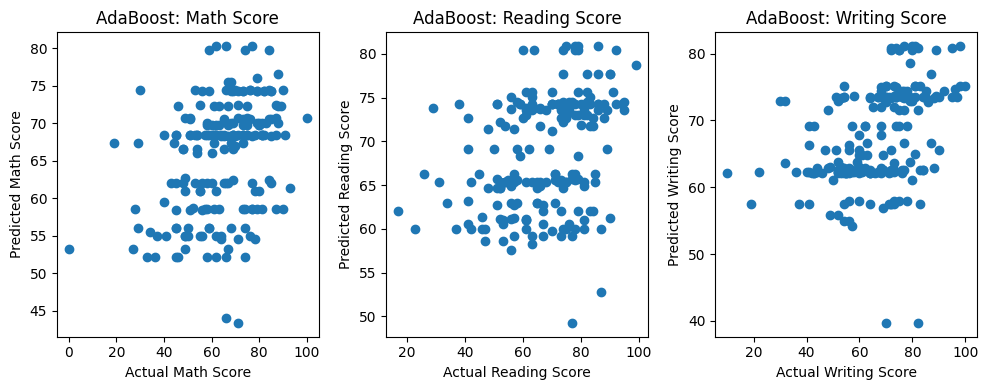

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("stud.csv")

# Split the data into features (X) and the target variables (y)
X = data[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']]
y_math = data['math_score']
y_reading = data['reading_score']
y_writing = data['writing_score']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
_, _, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=42)
_, _, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

# Train and predict for each subject
for model_name, model in models.items():
    model.fit(X_train, y_train_math)
    y_pred_math = model.predict(X_test)

    model.fit(X_train, y_train_reading)
    y_pred_reading = model.predict(X_test)

    model.fit(X_train, y_train_writing)
    y_pred_writing = model.predict(X_test)

    # Plot actual vs predicted scores for math
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.scatter(y_test_math, y_pred_math)
    plt.xlabel('Actual Math Score')
    plt.ylabel('Predicted Math Score')
    plt.title(f'{model_name}: Math Score')

    # Plot actual vs predicted scores for reading
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_reading, y_pred_reading)
    plt.xlabel('Actual Reading Score')
    plt.ylabel('Predicted Reading Score')
    plt.title(f'{model_name}: Reading Score')

    # Plot actual vs predicted scores for writing
    plt.subplot(1, 3, 3)
    plt.scatter(y_test_writing, y_pred_writing)
    plt.xlabel('Actual Writing Score')
    plt.ylabel('Predicted Writing Score')
    plt.title(f'{model_name}: Writing Score')

    plt.tight_layout()
    plt.show()


Linear Regression Metrics:
R2 Score: 0.028434503354754948
Mean Squared Error: 236.4191934488593
Mean Absolute Error: 12.139933939542738


C:\Users\hashm\AppData\Local\Temp\ipykernel_16752\3997854640.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['parental_level_of_education'] = X['parental_level_of_education'].map(education_mapping)


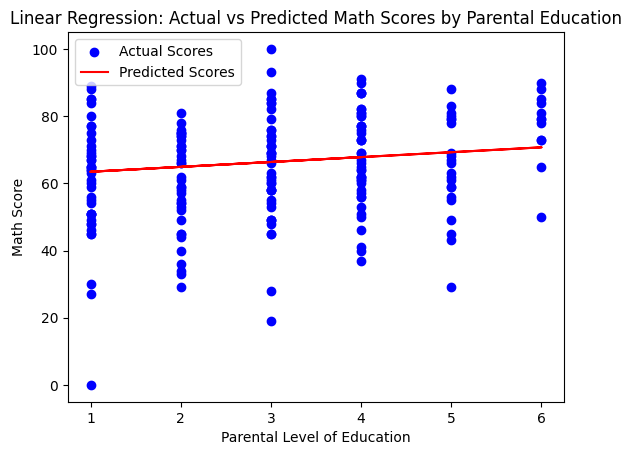

In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("stud.csv")

# Selecting features and target variable
X = data[['parental_level_of_education']]
y = data['math_score']

# Convert parental level of education to numerical using ordinal encoding (assuming higher education level corresponds to higher values)
education_mapping = {'some high school': 1, 'high school': 2, 'some college': 3, "associate's degree": 4, "bachelor's degree": 5, "master's degree": 6}
X['parental_level_of_education'] = X['parental_level_of_education'].map(education_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict scores for the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression Metrics:")
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plot actual vs predicted scores
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', label='Predicted Scores')
plt.xlabel('Parental Level of Education')
plt.ylabel('Math Score')
plt.title('Linear Regression: Actual vs Predicted Math Scores by Parental Education')
plt.legend()
plt.show()


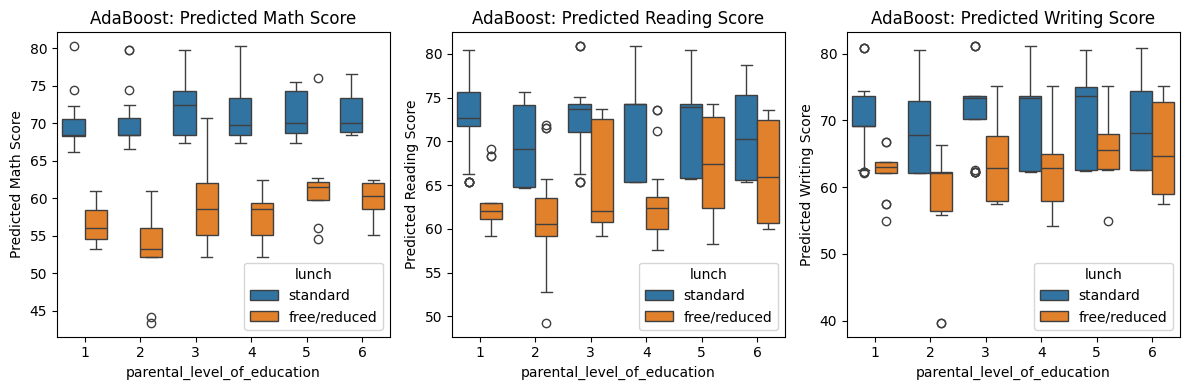

In [175]:
import itertools

# Define all possible combinations of factors
factors = ['parental_level_of_education', 'lunch']

# Join the predicted scores with the data, specifying a suffix for overlapping columns
joined_data = X_test.join(data[['math_score', 'reading_score', 'writing_score', *factors]], rsuffix='_data')

# Iterate through all possible combinations of factors
for factor_combination in itertools.combinations(factors, 2):
    # Plot predicted scores against the selected factors for math
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.boxplot(x=factor_combination[0], y=y_pred_math, hue=factor_combination[1], data=joined_data)
    plt.title(f'{model_name}: Predicted Math Score')
    plt.xlabel(factor_combination[0])
    plt.ylabel('Predicted Math Score')

    # Plot predicted scores against the selected factors for reading
    plt.subplot(1, 3, 2)
    sns.boxplot(x=factor_combination[0], y=y_pred_reading, hue=factor_combination[1], data=joined_data)
    plt.title(f'{model_name}: Predicted Reading Score')
    plt.xlabel(factor_combination[0])
    plt.ylabel('Predicted Reading Score')

    # Plot predicted scores against the selected factors for writing
    plt.subplot(1, 3, 3)
    sns.boxplot(x=factor_combination[0], y=y_pred_writing, hue=factor_combination[1], data=joined_data)
    plt.title(f'{model_name}: Predicted Writing Score')
    plt.xlabel(factor_combination[0])
    plt.ylabel('Predicted Writing Score')

    plt.tight_layout()
    plt.show()


Math Scores Metrics:
                         R2         MSE        MAE
Linear Regression  0.105902  217.568457  11.643510
Decision Tree      0.100430  218.900026  11.704500
Random Forest      0.098595  219.346564  11.708970
SVM                0.091283  221.125773  11.752555
KNN               -0.100039  267.681800  12.797000
AdaBoost           0.104407  217.932229  11.639835

Reading Scores Metrics:
                         R2         MSE        MAE
Linear Regression  0.079679  208.254330  11.295816
Decision Tree      0.073728  209.600970  11.297261
Random Forest      0.073487  209.655387  11.306055
SVM                0.064578  211.671351  11.381744
KNN               -0.241275  280.881200  13.250000
AdaBoost           0.074026  209.533493  11.402615

Writing Scores Metrics:
                         R2         MSE        MAE
Linear Regression  0.093665  218.442167  11.519291
Decision Tree      0.086606  220.143514  11.516837
Random Forest      0.088537  219.677979  11.500334
SVM        

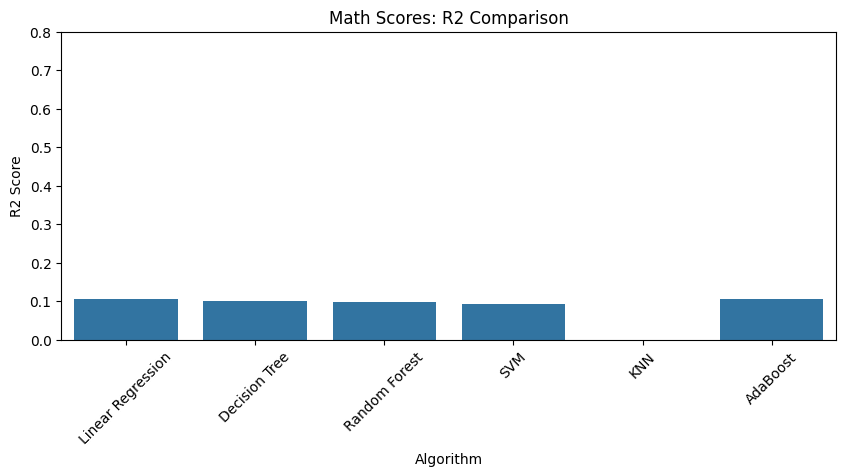

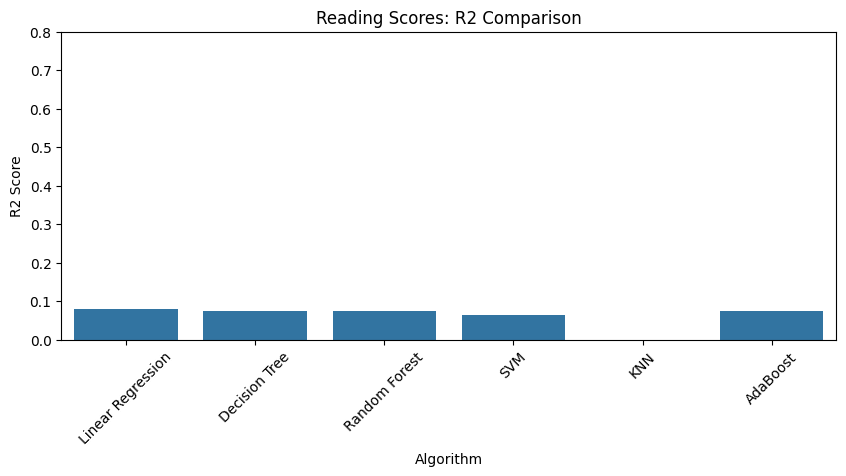

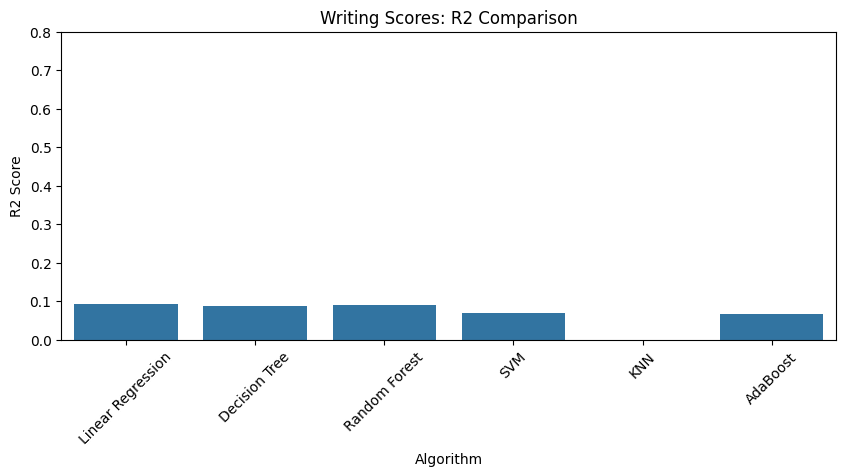

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("stud.csv")

# Select features and target variables
X = data[['parental_level_of_education', 'lunch']]
y_math = data['math_score']
y_reading = data['reading_score']
y_writing = data['writing_score']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
_, _, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=42)
_, _, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

# Initialize lists to store metrics
metrics_math = []
metrics_reading = []
metrics_writing = []

# Train and evaluate models
for model_name, model in models.items():
    # Train the model for math scores
    model.fit(X_train, y_train_math)
    y_pred_math = model.predict(X_test)
    r2_math = r2_score(y_test_math, y_pred_math)
    mse_math = mean_squared_error(y_test_math, y_pred_math)
    mae_math = mean_absolute_error(y_test_math, y_pred_math)
    metrics_math.append((r2_math, mse_math, mae_math))

    # Train the model for reading scores
    model.fit(X_train, y_train_reading)
    y_pred_reading = model.predict(X_test)
    r2_reading = r2_score(y_test_reading, y_pred_reading)
    mse_reading = mean_squared_error(y_test_reading, y_pred_reading)
    mae_reading = mean_absolute_error(y_test_reading, y_pred_reading)
    metrics_reading.append((r2_reading, mse_reading, mae_reading))

    # Train the model for writing scores
    model.fit(X_train, y_train_writing)
    y_pred_writing = model.predict(X_test)
    r2_writing = r2_score(y_test_writing, y_pred_writing)
    mse_writing = mean_squared_error(y_test_writing, y_pred_writing)
    mae_writing = mean_absolute_error(y_test_writing, y_pred_writing)
    metrics_writing.append((r2_writing, mse_writing, mae_writing))

# Create DataFrame for math scores metrics
df_math = pd.DataFrame(metrics_math, columns=['R2', 'MSE', 'MAE'], index=models.keys())

# Create DataFrame for reading scores metrics
df_reading = pd.DataFrame(metrics_reading, columns=['R2', 'MSE', 'MAE'], index=models.keys())

# Create DataFrame for writing scores metrics
df_writing = pd.DataFrame(metrics_writing, columns=['R2', 'MSE', 'MAE'], index=models.keys())

# Print metrics for math scores
print("Math Scores Metrics:")
print(df_math)

# Print metrics for reading scores
print("\nReading Scores Metrics:")
print(df_reading)

# Print metrics for writing scores
print("\nWriting Scores Metrics:")
print(df_writing)

# Plotting
for subject, df in zip(['Math', 'Reading', 'Writing'], [df_math, df_reading, df_writing]):
    plt.figure(figsize=(10, 4))
    sns.barplot(x=df.index, y='R2', data=df)
    plt.title(f'{subject} Scores: R2 Comparison')
    plt.xlabel('Algorithm')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=45)
    plt.ylim(0.0, 0.8)  # Limit y-axis to better visualize differences
    plt.show()


UNSUPERVISED LEARNING ALGORITHM SET

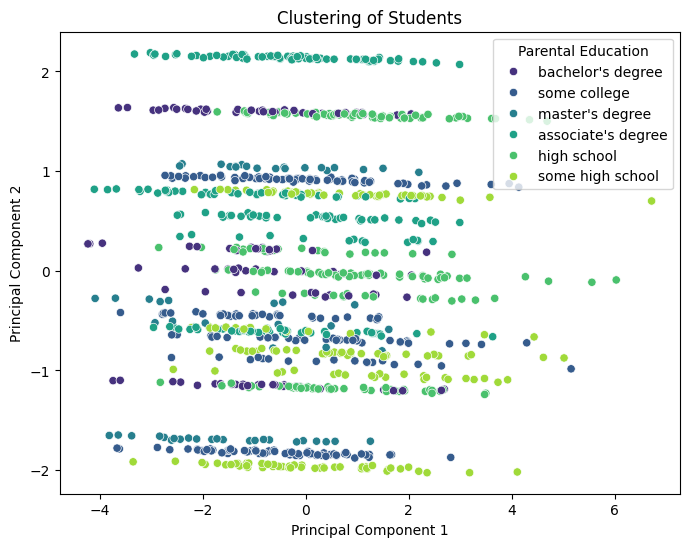

In [187]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame called 'data' containing relevant features
# Let's say it has columns: 'parental_level_of_education', 'race_ethnicity', 'math_score', 'reading_score', 'writing_score'

# Step 1: Select relevant features
features = ['parental_level_of_education', 'race_ethnicity', 'math_score', 'reading_score', 'writing_score']
X = data[features]

# Step 2: Encode categorical variables
# Define columns to be one-hot encoded
categorical_cols = ['parental_level_of_education', 'race_ethnicity']

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply transformation
X_encoded = preprocessor.fit_transform(X)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 4: Apply Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Set the number of components to 2
X_pca = pca.fit_transform(X_scaled)

# Step 5: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['parental_level_of_education'], palette='viridis')
plt.title('Clustering of Students')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Parental Education')
plt.show()


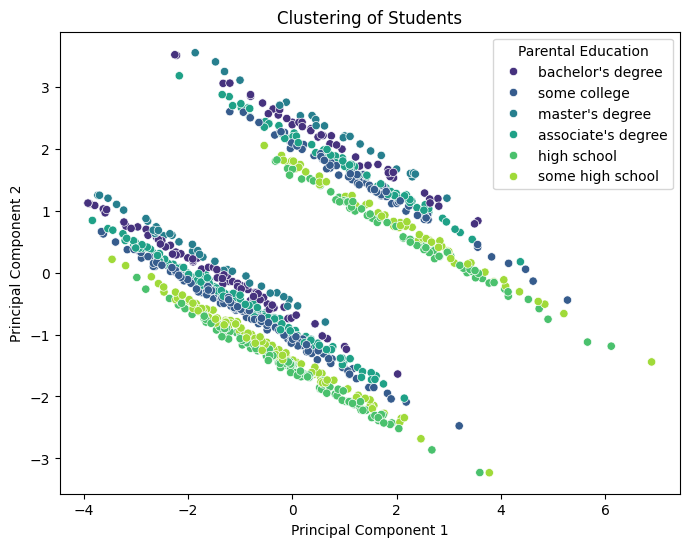

In [188]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame called 'data' containing relevant features
# Let's say it has columns: 'parental_level_of_education', 'lunch', 'math_score', 'reading_score', 'writing_score'

# Step 1: Select relevant features
features = ['parental_level_of_education', 'lunch', 'math_score', 'reading_score', 'writing_score']
X = data[features]

# Step 2: Encode categorical variables
# Define columns to be one-hot encoded
categorical_cols = ['parental_level_of_education', 'lunch']

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply transformation
X_encoded = preprocessor.fit_transform(X)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 4: Apply Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Set the number of components to 2
X_pca = pca.fit_transform(X_scaled)

# Step 5: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['parental_level_of_education'], palette='viridis')
plt.title('Clustering of Students')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Parental Education')
plt.show()


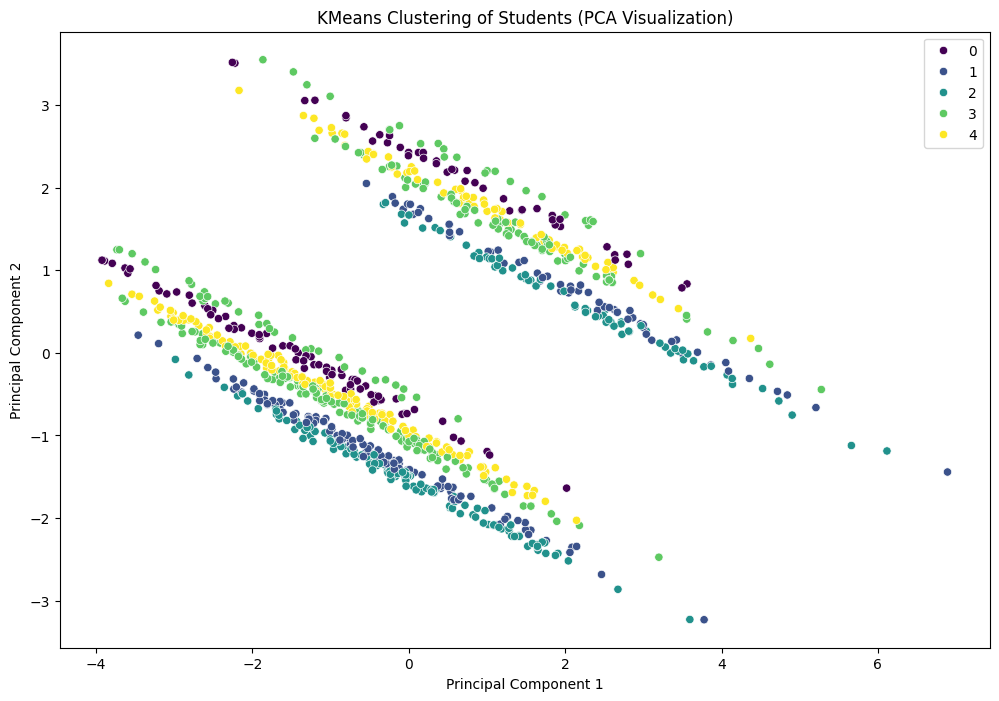

In [189]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame called 'data' containing relevant features
# Let's say it has columns: 'parental_level_of_education', 'lunch', 'math_score', 'reading_score', 'writing_score'

# Step 1: Select relevant features
features = ['parental_level_of_education', 'lunch', 'math_score', 'reading_score', 'writing_score']
X = data[features]

# Step 2: Encode categorical variables
# Define columns to be one-hot encoded
categorical_cols = ['parental_level_of_education', 'lunch']

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply transformation
X_encoded = preprocessor.fit_transform(X)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 4: Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 5: Apply Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Set the number of components to 2
X_pca = pca.fit_transform(X_scaled)

# Step 6: Visualize Clusters using PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.title('KMeans Clustering of Students (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


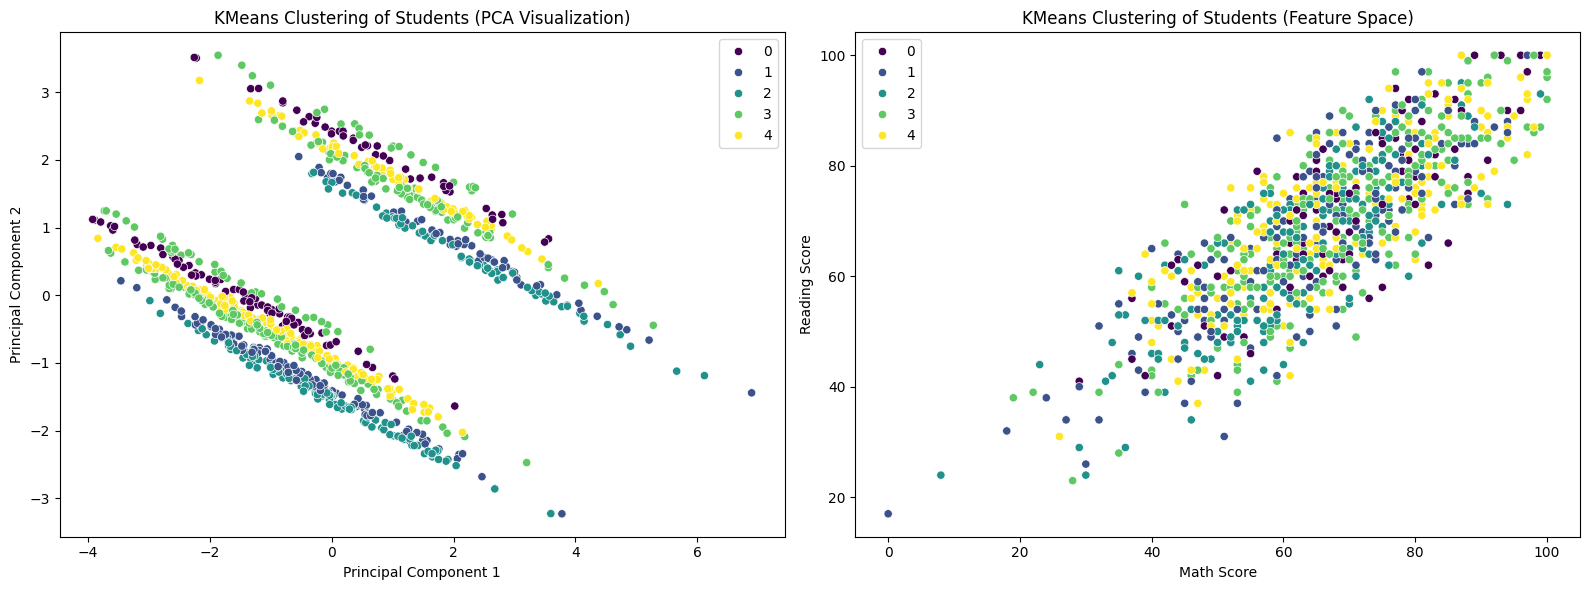

In [190]:
# Step 6: Visualize Clusters using PCA
plt.figure(figsize=(16, 6))

# Subplot 1: PCA Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.title('KMeans Clustering of Students (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Subplot 2: KMeans Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x='math_score', y='reading_score', hue=cluster_labels, palette='viridis', data=data)
plt.title('KMeans Clustering of Students (Feature Space)')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.tight_layout()
plt.show()
